# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** SALAISHA GHINA FEBRIZKA
- **Email:** salaishaagf@students.usu.ac.id
- **ID Dicoding:** salaishaagf

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling menguntungkan?
- Bagaimana kita dapat mengetahui produk yang paling disukai?

## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Membaca data dari setiap file CSV
customers_df = pd.read_csv("/content/customers_dataset.csv", delimiter=",")
order_items_df = pd.read_csv("/content/order_items_dataset.csv", delimiter=",")
orders_df = pd.read_csv("/content/orders_dataset.csv", delimiter=",")
products_df = pd.read_csv("/content/products_dataset.csv", delimiter=",")
sellers_df = pd.read_csv("/content/sellers_dataset.csv", delimiter=",")
product_category_name_translation_df = pd.read_csv("/content/product_category_name_translation.csv", delimiter=",")
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv", delimiter=",")
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv", delimiter=",")
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv", delimiter=",")


**Insight:**
- pd.read_csv() adalah fungsi yang digunakan untuk membaca data dari file CSV.

*  "/content/customers_dataset.csv" adalah path ke file CSV yang berisi data pelanggan

*   delimiter=",": Ini menunjukkan bahwa data dalam file CSV dipisahkan dengan koma.

### Assessing Data

In [5]:
#Menampilkan beberapa baris pertama dari setiap DataFrame
print("Customers DataFrame:")
print(customers_df.head())
print("\nOrder Items DataFrame:")
print(order_items_df.head())
print("\nOrders DataFrame:")
print(orders_df.head())
print("\nProducts DataFrame:")
print(products_df.head())
print("\nSellers DataFrame:")
print(sellers_df.head())
print("\nProduct Category Name Translation DataFrame:")
print(product_category_name_translation_df.head())
print("\nGeolocation DataFrame:")
print(geolocation_df.head())
print("\nOrder Payments DataFrame:")
print(order_payments_df.head())
print("\nOrder Reviews DataFrame:")
print(order_reviews_df.head())

Customers DataFrame:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Order Items DataFrame:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   


**Insight:**

Bagian ini bertujuan untuk memberikan gambaran awal tentang data yang ada di setiap DataFrame.

print("Customers DataFrame:") berguna untuk menampilkan teks "Customers DataFrame:" ke konsol

*   print("Customers DataFrame:") berguna untuk menampilkan teks "Customers DataFrame:" ke konsol

*   print(customers_df.head()) berguna unyuk menampilkan 5 baris pertama dari DataFrame customers_df ke konsol. Fungsi head() mengambil 5 baris pertama dari DataFrame secara default. Anda dapat mengubah jumlah baris yang ditampilkan dengan memberikan argumen ke fungsi head(), misalnya customers_df.head(10) untuk menampilkan 10 baris pertama.


*   print("\nOrder Items DataFrame:") berguna untuk menampilkan teks "Order Items DataFrame:" ke konsol, dengan baris baru (\n) untuk membuat jarak antara teks.


*   print(order_items_df.head()) menampilkan 5 baris pertama dari DataFrame order_items_df ke konsol.

### Cleaning Data
**1. untuk menemukan missing value pada data**

In [19]:
# Membuat dictionary untuk menyimpan missing values dari setiap DataFrame
missing_values_dict = {
    "Customers": customers_df.isnull().sum(),
    "Order Items": order_items_df.isnull().sum(),
    "Orders": orders_df.isnull().sum(),
    "Products": products_df.isnull().sum(),
    "Sellers": sellers_df.isnull().sum(),
    "Product Category Translation": product_category_name_translation_df.isnull().sum(),
    "Geolocation": geolocation_df.isnull().sum(),
    "Order Payments": order_payments_df.isnull().sum(),
    "Order Reviews": order_reviews_df.isnull().sum(),
}

# Mengubah dictionary menjadi DataFrame
missing_values_df = pd.DataFrame(missing_values_dict)

# Menampilkan tabel missing values
print("Missing Values in Each DataFrame:")
print(missing_values_df)

# Jika ingin mengurutkan berdasarkan jumlah missing values pada setiap DataFrame
sorted_missing_values_df = missing_values_df.sort_values(by=missing_values_df.columns[0], ascending=False)
print("\nSorted Missing Values Table:")
print(sorted_missing_values_df)

Missing Values in Each DataFrame:
                               Customers  Order Items  Orders  Products  \
customer_city                        0.0          NaN     NaN       NaN   
customer_id                          0.0          NaN     0.0       NaN   
customer_state                       0.0          NaN     NaN       NaN   
customer_unique_id                   0.0          NaN     NaN       NaN   
customer_zip_code_prefix             0.0          NaN     NaN       NaN   
freight_value                        NaN          0.0     NaN       NaN   
geolocation_city                     NaN          NaN     NaN       NaN   
geolocation_lat                      NaN          NaN     NaN       NaN   
geolocation_lng                      NaN          NaN     NaN       NaN   
geolocation_state                    NaN          NaN     NaN       NaN   
geolocation_zip_code_prefix          NaN          NaN     NaN       NaN   
order_approved_at                    NaN          NaN   160.0     

In [49]:
# Membuat list DataFrames
all_df = [customers_df, order_items_df, orders_df, products_df, sellers_df, product_category_name_translation_df, geolocation_df, order_payments_df, order_reviews_df]

# Menggabungkan semua bingkai data menjadi satu bingkai data
all_df = pd.concat(all_df, axis=1)

# Menyimpan data yang telah dibersihkan
all_df.to_csv("all_data.csv", index=False)

**Insight:**

df.isnull().sum() bertujuan untuk menampilkan jumlah nilai kosong di setiap kolom.

df.info() digunakan untuk menampilkan informasi tentang DataFrame, termasuk jumlah non-null values.

df.isna().any() digunakan untuk mengembalikan True jika ada nilai kosong di DataFrame

**2. Menghapus dan mengisi missing values**

In [17]:
# Menghapus baris yang memiliki missing values (jika tidak terlalu banyak)
customers_df_cleaned = customers_df.dropna()
order_items_df_cleaned = order_items_df.dropna()
orders_df_cleaned = orders_df.dropna()
products_df_cleaned = products_df.dropna()
sellers_df_cleaned = sellers_df.dropna()
product_category_name_translation_df_cleaned = product_category_name_translation_df.dropna()
geolocation_df_cleaned = geolocation_df.dropna()
order_payments_df_cleaned = order_payments_df.dropna()
order_reviews_df_cleaned = order_reviews_df.dropna()

#Isi missing values dengan rata-rata
numeric_cols_orders = orders_df.select_dtypes(include=['number']).columns
orders_df_cleaned = orders_df.fillna(orders_df[numeric_cols_orders].mean())
numeric_cols_order_items = order_items_df.select_dtypes(include=['number']).columns
order_items_df_cleaned = order_items_df.fillna(order_items_df[numeric_cols_order_items].mean())
numeric_cols_order_payments = order_payments_df.select_dtypes(include=['number']).columns
order_payments_df_cleaned = order_payments_df.fillna(order_payments_df[numeric_cols_order_payments].mean())
numeric_cols_order_reviews = order_reviews_df.select_dtypes(include=['number']).columns
order_reviews_df_cleaned = order_reviews_df.fillna(order_reviews_df[numeric_cols_order_reviews].mean())
numeric_cols_geolocation = geolocation_df.select_dtypes(include=['number']).columns
geolocation_df_cleaned = geolocation_df.fillna(geolocation_df[numeric_cols_geolocation].mean())
numeric_cols_products = products_df.select_dtypes(include=['number']).columns
products_df_cleaned = products_df.fillna(products_df[numeric_cols_products].mean())
numeric_cols_sellers = sellers_df.select_dtypes(include=['number']).columns
sellers_df_cleaned = sellers_df.fillna(sellers_df[numeric_cols_sellers].mean())
numeric_cols_product_category_name_translation = product_category_name_translation_df.select_dtypes(include=['number']).columns
product_category_name_translation_df_cleaned = product_category_name_translation_df.fillna(product_category_name_translation_df[numeric_cols_product_category_name_translation].mean())

**Insight**:

tujuan daripada ini adalah mengatasi nilai kosong yang ditemukan

df.dropna() digunakan untuk menghapus nilai kosong

df.fillna(value) digunakan untuk mengisi nilai kosong dengan nilai tertentu.

## Exploratory Data Analysis (EDA)

### Untuk melihat informasi penjualan

In [26]:
# Menggabungkan order_items_df dengan products_df untuk mendapatkan informasi nama produk
merged_df = pd.merge(order_items_df, products_df[['product_id', 'product_category_name']], on='product_id', how='inner')

# Menghitung total penjualan dan total pendapatan per produk
sales_by_product = merged_df.groupby('product_category_name').agg(
    total_items_sold=('order_item_id', 'count'),   # Menghitung jumlah item yang terjual
    total_revenue=('price', 'sum')  # Menghitung total pendapatan
).reset_index()

# Menampilkan hasil
print("Informasi Penjualan berdasarkan Nama Produk:")
print(sales_by_product.sort_values(by='total_items_sold', ascending=False))

# Jika ingin menampilkan hanya beberapa baris produk dengan penjualan terbanyak
print("\nTop 10 Produk dengan Penjualan Terbanyak:")
print(sales_by_product.sort_values(by='total_items_sold', ascending=False).head(10))


Informasi Penjualan berdasarkan Nama Produk:
            product_category_name  total_items_sold  total_revenue
13                cama_mesa_banho             11115     1036988.68
11                   beleza_saude              9670     1258681.34
32                  esporte_lazer              8641      988048.97
54               moveis_decoracao              8334      729762.49
44         informatica_acessorios              7827      911954.32
..                            ...               ...            ...
17              cds_dvds_musicais                14         730.00
46                     la_cuisine                14        2054.99
60                       pc_gamer                 9        1545.95
37  fashion_roupa_infanto_juvenil                 8         569.85
67             seguros_e_servicos                 2         283.29

[73 rows x 3 columns]

Top 10 Produk dengan Penjualan Terbanyak:
     product_category_name  total_items_sold  total_revenue
13         cama_mesa_banh

**Insight:**


*   [['product_id', 'product_category_name']] hanya mengambil kolom product_id dan product_category_name dari products_df untuk menghindari penggabungan kolom yang tidak diperlukan.

*   on='product_id' untuk menentukan kolom yang digunakan untuk menggabungkan kedua DataFrame.

*   how='inner' inner join digunakan untuk, yang hanya mengambil data yang memiliki product_id yang sama di kedua DataFrame.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk mana yang paling menguntungkan?

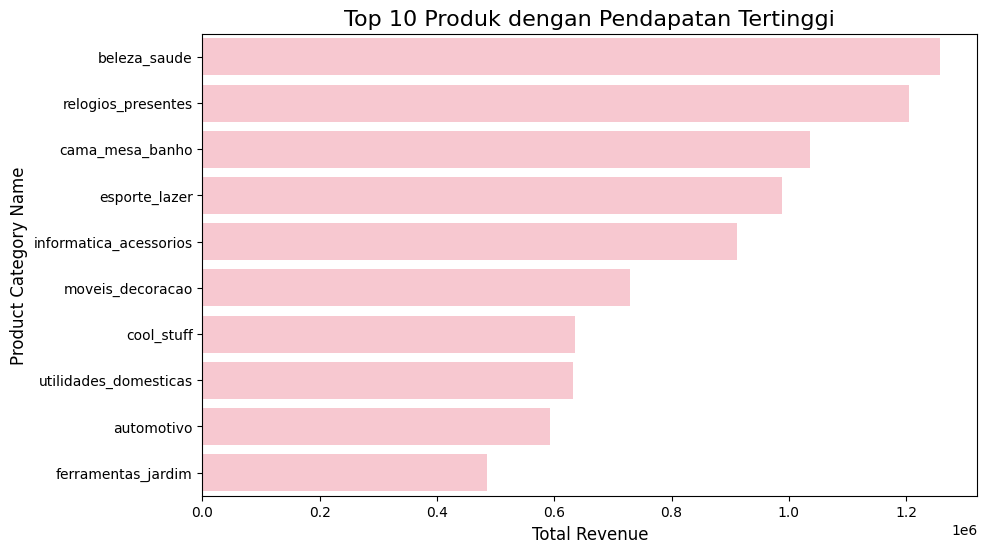

In [46]:
# Mengambil data 10 produk dengan total pendapatan tertinggi
top_revenue_products = sales_by_product.sort_values(by='total_revenue', ascending=False).head(10)

# Membuat ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar chart menggunakan Seaborn
sns.barplot(x='total_revenue', y='product_category_name', data=top_revenue_products, color='pink')

# Menambahkan judul dan label
plt.title('Top 10 Produk dengan Pendapatan Tertinggi', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Category Name', fontsize=12)

# Menampilkan plot
plt.show()


**Insight:**

*   sort_values(by='total_revenue', ascending=False): Mengurutkan DataFrame berdasarkan kolom total_revenue secara descending (dari yang terbesar ke terkecil).


*   head(10): Mengambil 10 baris pertama dari DataFrame yang telah diurutkan, sehingga menghasilkan 10 produk dengan total pendapatan tertinggi.

*   plt.figure(): Fungsi untuk membuat figure plot.

*   figsize=(10, 6): Menentukan ukuran figure plot dalam inci.

*   sns.barplot(): Fungsi untuk membuat bar chart

*   x='total_revenue': Menentukan kolom total_revenue sebagai sumbu x.
y='product_category_name': Menentukan kolom product_category_name sebagai sumbu y.

*   data=top_revenue_products: Menentukan DataFrame top_revenue_products sebagai data yang akan digunakan untuk membuat bar chart.

### Pertanyaan 2: Bagaimana kita dapat mengetahui produk yang paling disukai?

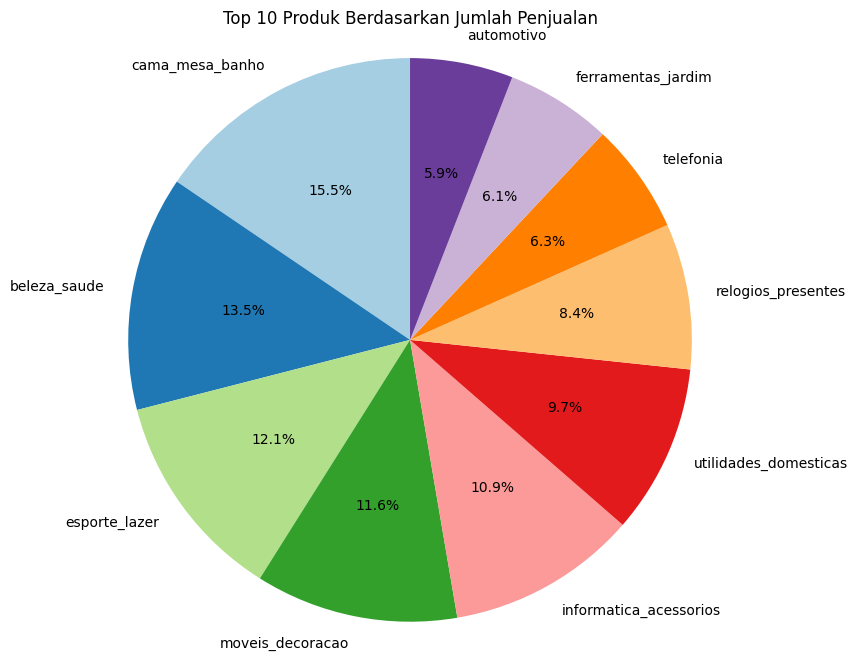

In [45]:
# Mengambil hanya kategori produk dan total item terjual
top_sales_by_product = sales_by_product.sort_values(by='total_items_sold', ascending=False).head(10)  # Top 10 produk
product_categories = top_sales_by_product['product_category_name']
total_items_sold = top_sales_by_product['total_items_sold']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_items_sold, labels=product_categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Menambahkan judul
plt.title('Top 10 Produk Berdasarkan Jumlah Penjualan')

# Menampilkan chart
plt.axis('equal')  # Menjaga pie chart berbentuk lingkaran
plt.show()


**Insight:**

*   sort_values(by='total_revenue', ascending=False): Mengurutkan DataFrame berdasarkan kolom total_revenue secara descending (dari yang terbesar ke terkecil).


*   head(10): Mengambil 10 baris pertama dari DataFrame yang telah diurutkan, sehingga menghasilkan 10 produk dengan total pendapatan tertinggi.

*   plt.figure(): Fungsi untuk membuat figure plot.

*   figsize=(10, 6): Menentukan ukuran figure plot dalam inci.

*   sns.barplot(): Fungsi untuk membuat bar chart

*   x='total_revenue': Menentukan kolom total_revenue sebagai sumbu x.
y='product_category_name': Menentukan kolom product_category_name sebagai sumbu y.

*   data=top_revenue_products: Menentukan DataFrame top_revenue_products sebagai data yang akan digunakan untuk membuat bar chart.

## Conclusion



*   Produk yang paling menguntungkan pada penjualan adalah beleza saude dari tabel bar yang telah kita analisis
*   Dari pie chart ditampilkan 10 besar produk yang paling disukai banyak orang berurutan dari yang paling terbesar adalah

cama mesa banho

beleza saude

esporte lazer

moveis decoracao

informatica accesorious

utilidades domesticas

religios presentes

telefonia

ferramentas jardim

automotivio
